<a href="https://colab.research.google.com/github/Thuy01234567/Modul2/blob/main/Modul3_BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Đánh giá phim**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = 'IMDB-Movie-Data.csv'

# Read data from .csv file
data = pd.read_csv(dataset_path)

In [ ]:
# Read data with specified explicit index .
# We will use this later in our analysis
data_indexed = pd.read_csv(dataset_path, index_col ="Title")

In [ ]:
# Preview top 5 rows using head ()
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# Let ’s first understand the basic information about this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
# Thống kê dữ liệu
data.describe ()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
# Extract data as series
genre = data['Genre']
genre

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [ ]:
# Extract data as dataframe
data [['Genre']]

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [ ]:
# Tách nhiều cột thành 1 DataFrame
some_cols = data [['Title','Genre','Actors','Director','Rating']]
some_cols

,Title,Genre,Actors,Director,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi","Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",James Gunn,8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi","Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,7.0
2,Split,"Horror,Thriller","James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",M. Night Shyamalan,7.3
3,Sing,"Animation,Comedy,Family","Matthew McConaughey,Reese Witherspoon, Seth Ma...",Christophe Lourdelet,7.2
4,Suicide Squad,"Action,Adventure,Fantasy","Will Smith, Jared Leto, Margot Robbie, Viola D...",David Ayer,6.2
...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",Billy Ray,6.2
996,Hostel: Part II,Horror,"Lauren German, Heather Matarazzo, Bijou Philli...",Eli Roth,5.5
997,Step Up 2: The Streets,"Drama,Music,Romance","Robert Hoffman, Briana Evigan, Cassie Ventura,...",Jon M. Chu,6.2
998,Search Party,"Adventure,Comedy","Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",Scot Armstrong,5.6


In [ ]:
#Tách nhiều hàng thành DataFrame
data.iloc [10:15][['Title','Rating','Revenue (Millions)']]

,Title,Rating,Revenue (Millions)
10,Fantastic Beasts and Where to Find Them,7.5,234.02
11,Hidden Figures,7.8,169.27
12,Rogue One,7.9,532.17
13,Moana,7.7,248.75
14,Colossal,6.4,2.87


In [ ]:
data[((data['Year']>= 2010) & (data['Year'] <= 2015) )
  & ( data['Rating'] < 6.0)
  & ( data['Revenue (Millions)'] > data ['Revenue (Millions)'].quantile (0.95) ) ]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


In [ ]:
# Gom nhóm dữ liệu dựa trên một hoặc nhiều biến
data.groupby('Director') [['Rating']].mean().head()

,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


In [ ]:
# Sắp xếp các hàng trong bảng dữ liệu
data.groupby('Director') [['Rating']].mean().sort_values(['Rating'], ascending = False).head()

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50


In [ ]:
# Kiểm tra xem vị trí bị mất mát dữ liệu
# To check null values row - wise
data.isnull().sum ()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


Ở đây ta thấy Revenue (Millions) và Metascore là 2 cột có chứa dữ liệu null. Để xử lý vấn đề mất
mát dữ liệu, có hai phương án chính: hoặc thế các vùng trống bằng một giá trị nào đó hoặc loại
bỏ chúng.

Ở đây ta thấy Revenue (Millions) và Metascore là 2 cột có chứa dữ liệu null. Để xử lý vấn đề mất mát dữ liệu, có hai phương án chính: hoặc thế các vùng trống bằng một giá trị nào đó hoặc loại bỏ chúng.

In [ ]:
# Use drop function to drop columns
data.drop('Metascore', axis =1).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


Lệnh trên vẫn chưa drop data thực trên server cho tới khi ta thêm inplace=True.
Đối với xóa hàng, ta dùng:

In [ ]:
data.dropna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


Đối với phương án thế giá trị mới vào các ô trống, ta
có thể sử dụng các giá trị mean, median... của cột dữ liệu tương ứng để thay thế (việc chọn giá
trị để thay thế còn tùy thuộc vào tính chất của bộ dữ liệu, bài toán đang giải quyết...). Ví dụ, có
một vài hàng có Revenue mang giá trị null, ta có thể gán cho nó giá trị trung bình như sau:

In [ ]:
revenue_mean = data_indexed['Revenue (Millions)'].mean()
print ("The mean revenue is: ", revenue_mean )

# We can fill the null values with this mean revenue
data_indexed['Revenue (Millions)'].fillna(revenue_mean, inplace = True )

The mean revenue is:  82.95637614678898


Apply functions được dùng khi ta muốn thực thi một hàm nào đó lên các hàng trong bảng dữ liệu. Sau khi thực thi, kết quả trả về từ hàm chính là giá trị mới của hàng
tương ứng. Ví dụ, ta muốn phân loại phim theo ba mức độ [’Good’, ’Average’, ’Bad’] dựa trên Rating, ta có thể định nghĩa một hàm để làm đều này và apply nó lên DataFrame:

In [ ]:
# Classify movies based on ratings
def rating_group(rating):
  if rating >= 7.5:
    return 'Good'
  elif rating >= 6.0:
    return 'Average'
  else:
    return 'Bad'
# Lets apply this function on our movies data
# creating a new variable in the dataset to hold the rating category
data['Rating_category'] = data ['Rating'].apply(rating_group)
data[['Title','Director','Rating','Rating_category']].head(10)

,Title,Director,Rating,Rating_category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Average
5,The Great Wall,Yimou Zhang,6.1,Average
6,La La Land,Damien Chazelle,8.3,Good
7,Mindhorn,Sean Foley,6.4,Average
8,The Lost City of Z,James Gray,7.1,Average
9,Passengers,Morten Tyldum,7.0,Average


## **2. Dữ liệu Time Series**

In [4]:
import pandas as pd

dataset_path = 'opsd_germany_daily.csv'

# Read data from .csv file
opsd_daily = pd.read_csv(dataset_path )

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head (3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


Đối với dạng dữ liệu Time Series, ta có thể chọn cột Date làm index (vì giá trị cột này trong bộ
dữ liệu luôn là duy nhất (unique)):

In [6]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head (3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


Ta có thể thực hiện lại bước load file và lúc này, chỉ định cột sẽ làm chỉ mục ngay từ lúc thực hiện lời gọi hàm, đồng thời tạo thêm các số cột Year, Month, Weekday trích từ cột Date để thuận tiện cho việc xử lý một số bước về sau:

In [9]:
opsd_daily = pd.read_csv ('opsd_germany_daily.csv', index_col =0 , parse_dates = True )

# Add columns with year , month , and weekday name
opsd_daily ['Year'] = opsd_daily.index.year
opsd_daily ['Month'] = opsd_daily.index.month
opsd_daily ['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample (5, random_state =0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [ ]:
Một trong những tính năng nổi trội của pandas khi xử lý dữ liệu time series là tính năng time-based indexing, liên quan đến việc dùng dates và times để tổ chức và truy
cập dữ liệu (khá giống với Indexing ở phần trước nhưng giá trị lúc này sẽ là ngày tháng năm).
Việc này cho phép ta dùng loc accessor để thực thi. Ví dụ, ta có thể truy cập dữ liệu theo một khoảng thời gian từ ngày 2014-01-20 đến ngày 2014-01-22:

In [10]:
opsd_daily.loc['2016-08-15':'2016-08-18']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2016-08-15,1286.423,64.967,173.784,238.751,2016,8,Monday
2016-08-16,1346.943,63.308,183.882,247.190,2016,8,Tuesday
2016-08-17,1342.218,45.539,188.333,233.872,2016,8,Wednesday
2016-08-18,1354.995,47.811,161.679,209.490,2016,8,Thursday


Một tính năng khác của pandas là partial-string indexing, cho phép ta Slicing theo mô tả thời gian một cách chung chung, không cần cụ thể ngày tháng năm như ở phần trên. Ví dụ:

In [11]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


Với việc pandas có hỗ trợ trực quan hóa dữ liệu lên đồ thị, phối hợp với thư viện seaborn ta có thể dễ dàng trực quan hóa được dữ liệu time-series lên đồ thị. Ví dụ, ta trực quan (plot) dữ liệu cột Consumption như sau:

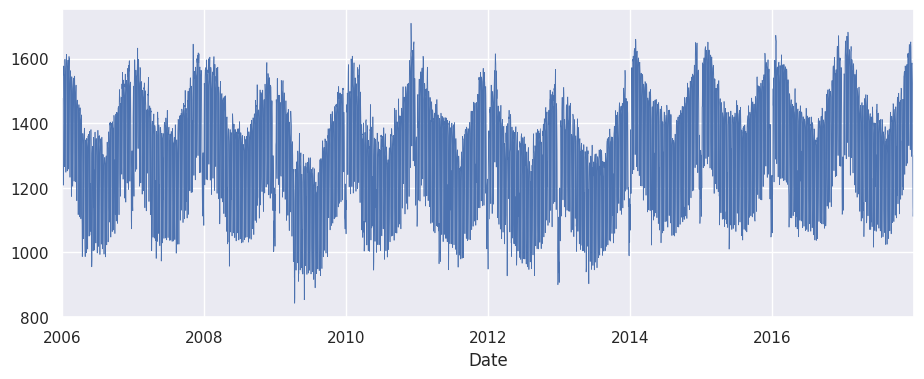

In [12]:
import matplotlib . pyplot as plt
# Display figures inline in Jupyter notebook

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc ={'figure.figsize':(11, 4)})
opsd_daily ['Consumption'].plot(linewidth =0.5);

Ta có thể plot cùng lúc một số cột dữ liệu khác thành từng đồ thị riêng lẻ:

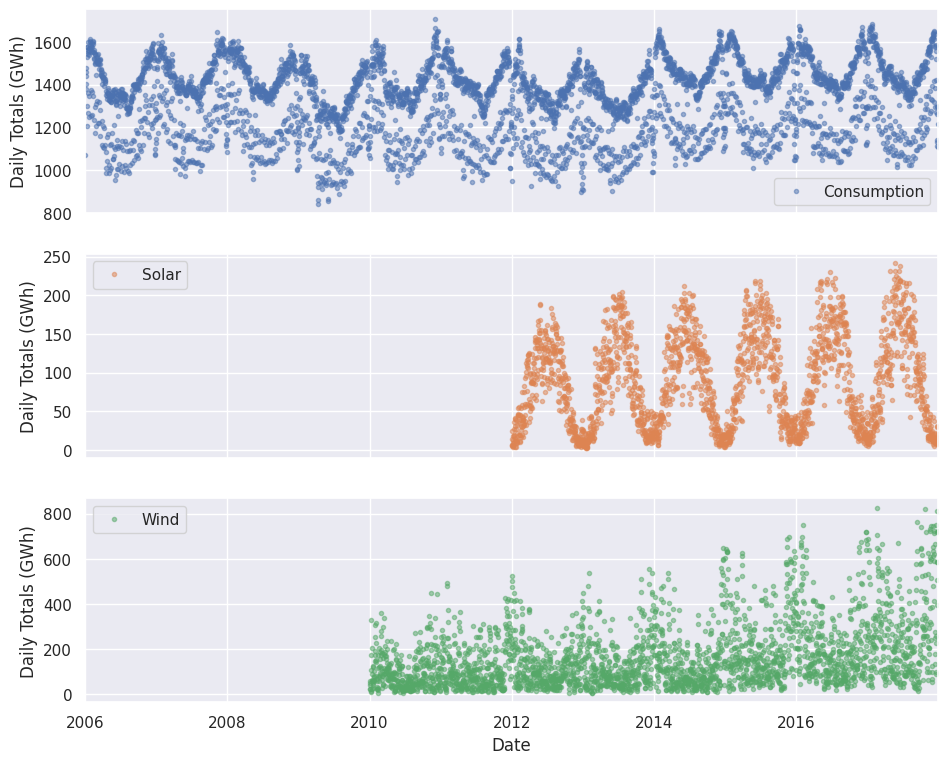

In [13]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker ='.', alpha =0.5 , linestyle ='None', figsize =(11 , 9) , subplots = True )
for ax in axes :
  ax.set_ylabel('Daily Totals (GWh)')
plt.show ()

Seasonality: Tạm dịch: tính thời vụ. Chỉ số về các đặc trưng lặp đi lặp lại trong một khoảng thời gian cố định xuyên suốt các năm. Các dạng đặc trưng này thường được ảnh hưởng bởi rất nhiều yếu tố khác nhau. Ở trong dữ liệu của bài, ta có thể khai phá tính thời vụ của dữ liệu, dùng
seaborn để vẽ, và group dữ liệu thành từng nhóm như sau:

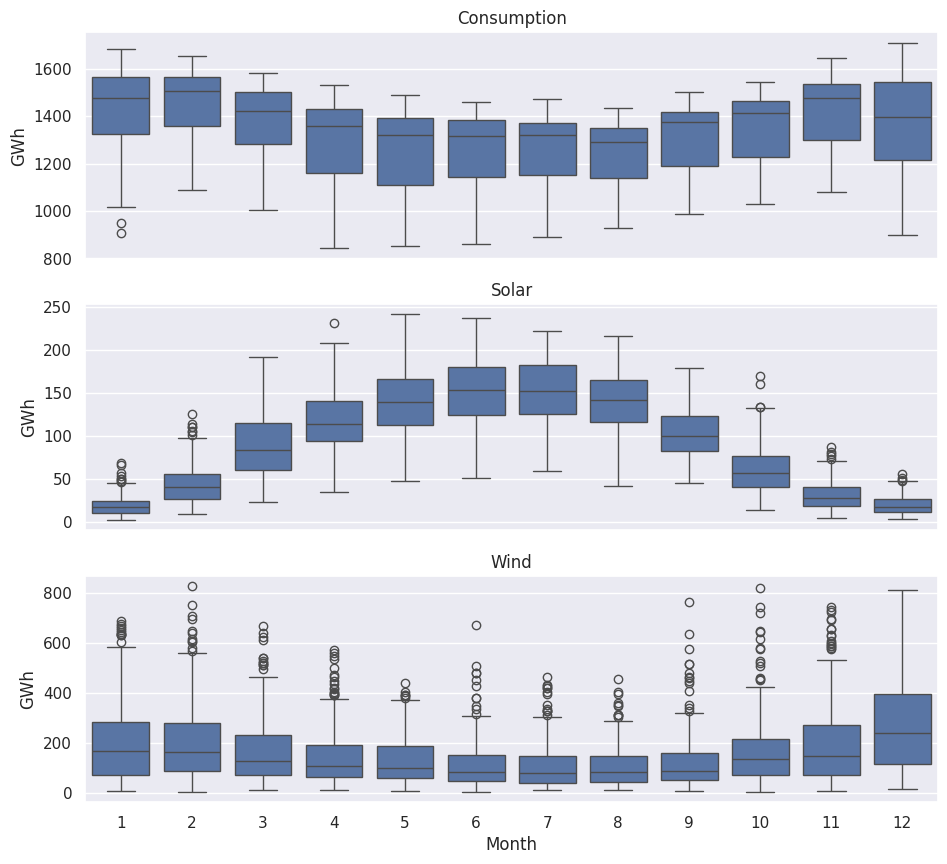

In [14]:
fig, axes = plt.subplots(3, 1, figsize =(11, 10), sharex = True )
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes ):
  sns.boxplot(data = opsd_daily, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  # Remove the automatic x- axis label from all but the bottom subplot
  if ax != axes [-1]:
    ax.set_xlabel('')

Frequencies: Trong DatetimeIndex của pandas, ta có thể sử dụng các giá trị thời gian sẵn có
để tạo thành một chuỗi giá trị theo tần suất. Ví dụ, với hai giá trị ’1998-03-10’ và ’1998-03-14’,
ta có thể tạo một danh sách thời gian với tần suất theo ngày. Tức danh sách mới của chúng ta
trở thành: ’1998-03-10’, ’1998-03-11’, ’1998-03-12’, ’1998-03-13’, ’1998-03-14’. Việc này được thực
hiện bằng cách cài đặt thuộc tính ’freq’.

In [15]:
pd.date_range ('1998-03-10', '1998-03-15', freq ='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

Với tính năng này của pandas, ta có thể thực hiện việc thế dữ liệu bị mất bằng kỹ thuật forward
fill (ffill). Kỹ thuật này liên quan đến việc sử dụng giá trị ghi nhận được tại thời điểm trước đó
làm giá trị thay thế cho toàn bộ giá trị bị mất mát sau đó trước khi gặp được mẫu dữ liệu có giá
trị. Ví dụ, giả sử ta biết được giá trị Consumption của một vài ngày như sau:

In [16]:
# To select an arbitrary sequence of date / time values from a pandas time series ,
# we need to use a DatetimeIndex , rather than simply a list of date / time strings
times_sample = pd.to_datetime (['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [17]:
# Convert the data to daily frequency , without filling any missings
consum_freq = consum_sample.asfreq ('D')
# Create a column with missings forward filled
consum_freq ['Consumption - Forward Fill'] = consum_sample.asfreq('D', method ='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


Resampling: Là kỹ thuật dùng để thay đổi tần số biểu diễn của bộ dữ liệu time series, có thể gia tăng hoặc giảm đi tần số lấy mẫu. Ví dụ, ta có thể giảm tần số của bộ dữ liệu hiện tại từ ngày sang tháng. Điều này đồng nghĩa với việc bộ dữ liệu mới của chúng ta sẽ có ít mẫu dữ liệu hơn
bản gốc.

In [18]:
# Specify the data columns we want to include (i.e. exclude Year , Month , Weekday Name )
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency , aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head (3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Dĩ nhiên, khi ta downsampling bộ dữ liệu, số lượng mẫu dữ liệu của bảng dữ liệu mới sẽ ít hơn so với bảng gốc và ít hơn 1/7 lần. Có thể kiểm tra bằng cách dùng thuộc tính shape của DataFrame:

In [19]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


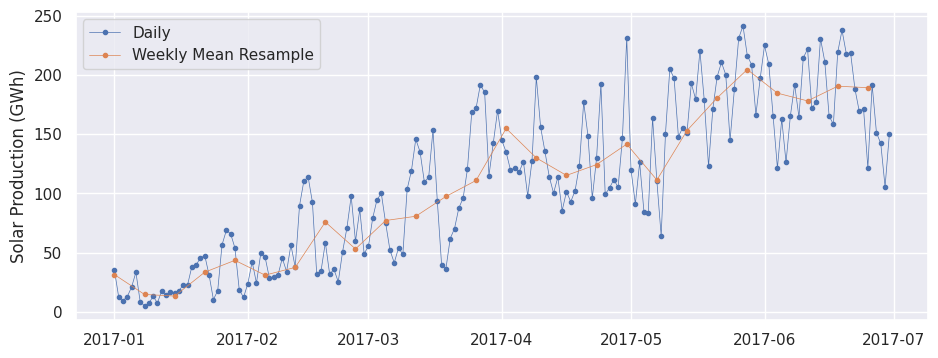

In [22]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots ()
ax.plot(opsd_daily.loc[start:end , 'Solar'] , marker ='.', linestyle ='-', linewidth =0.5 , label ='Daily')
ax.plot(opsd_weekly_mean.loc[start:end , 'Solar'], marker ='.', linestyle ='-', linewidth =0.5, label ='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

Lưu ý rằng bảng dữ liệu gốc của chúng ta có tồn một số giá trị null. Vì vậy để đảm bảo toàn bộ các mẫu có giá trị, ta cài đặt tham số min_count vào để xử lý vấn đề này. Ví dụ, ta resampling bộ dữ liệu thành theo năm, để đảm bảo các ngày trong năm đều tồn tại giá trị non-null, ta có thể cài đặt min_count=360 (các bạn có thể chọn min_count bằng một giá trị khác tùy vào quan
sát cá nhân):

In [25]:
# Compute the annual sums , setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum( min_count =360)
# The default index of the resampled DataFrame is the last day of each year ,
# ( ’2006 -12 -31 ’ , ’2007 -12 -31 ’ , etc .) so to make life easier , set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind + Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual ['Wind+Solar'] / opsd_annual ['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


Ta có thể vẽ biểu đồ hiển thị sản lượng sản xuất năng lượng gió và mặt trời đóng góp vào mức độ tiêu thụ điện năng kể từ năm 2012 như sau:

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

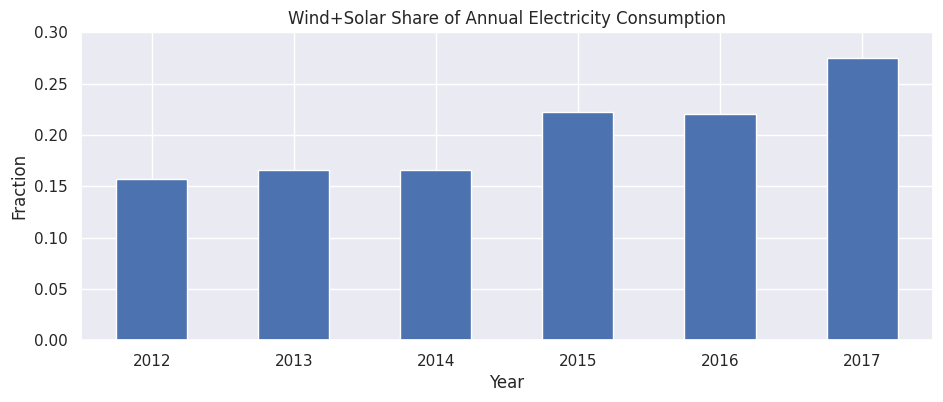

In [28]:
# Plot from 2012 onwards , because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color ='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind+Solar Share of Annual Electricity Consumption')
plt.xticks(rotation =0)

Rolling windows: Rolling window cũng là một hoạt động chuyển thông tin quan trọng trong dữliệ u time series. Giống downsampling, rolling windows chia dữ liệu thành các time windows (các khoảng thời gian như tuần, tháng... được trượt trên các mẫu dữ liệu theo ngày) và dữ liệu trong mỗi window đó được tổng hợp với hàm mean(), median(), sum(),... Tuy nhiên, không giống như downsampling, khi mà dữ liệu không overlap nhau và output luôn có tần số thấp hơn input, rolling windows overlap và gom thành những dữ liệu có cùng tần số, vì thế time series được chuyển có cùng tần số với time series gốc. Ta ví dụ với rolling trong 7 ngày:

In [29]:
# Compute the centered 7- day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center = True ).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


Trends: Là một đặc trưng chỉ xu hướng của dữ liệu, có thể tăng hoặc giảm đi trong một khoảng thời gian dài. Với kỹ thuật rolling windows, ta có thể dễ dàng trực quan hóa trends của bộ dữ liệu, tại các time scales khác nhau. Ví dụ, ta tính 365-day rolling mean:

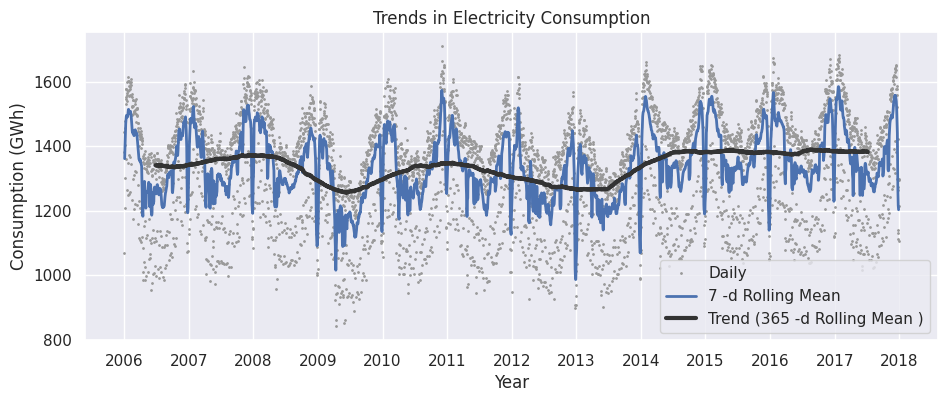

In [31]:
import matplotlib.dates as mdates

# The min_periods =360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window =365, center =True, min_periods=360).mean ()

# Plot daily , 7 -day rolling mean , and 365 - day rolling mean time series
fig, ax = plt.subplots ()
ax. plot(opsd_daily ['Consumption'], marker ='.', markersize =2, color ='0.6',
linestyle ='None', label ='Daily')
ax.plot( opsd_7d ['Consumption'], linewidth =2, label ='7 -d Rolling Mean')
ax.plot( opsd_365d ['Consumption'], color ='0.2', linewidth =3,
label ='Trend (365 -d Rolling Mean )')
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator () )
ax.legend ()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

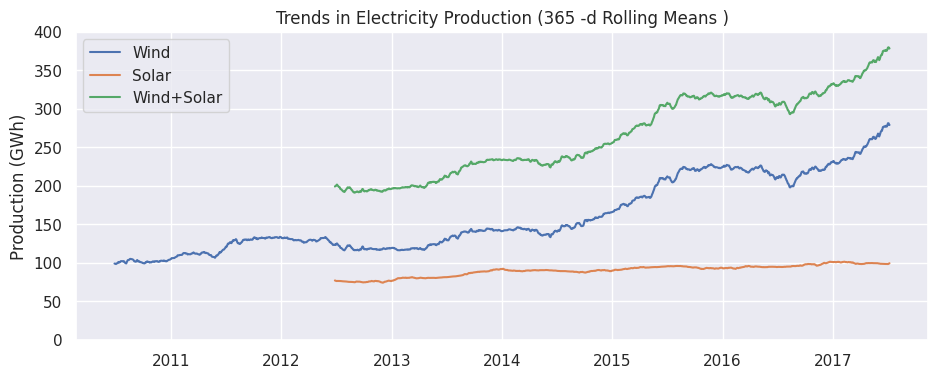

In [33]:
# Plot 365 - day rolling mean time series of wind and solar power
fig, ax = plt.subplots ()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
  ax.plot(opsd_365d[nm], label=nm)
  # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
  ax.xaxis.set_major_locator( mdates.YearLocator())
  ax.set_ylim(0, 400)
  ax.legend()
  ax.set_ylabel('Production (GWh)')
  ax.set_title('Trends in Electricity Production (365 -d Rolling Means )')
plt.show()